In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
Boston = load_data('Boston')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
crim_median = Boston['crim'].median()

In [7]:
Boston['crim_bin'] = np.where(Boston['crim'] > crim_median, 1, 0)

array([[<Axes: xlabel='crim', ylabel='crim'>,
        <Axes: xlabel='zn', ylabel='crim'>,
        <Axes: xlabel='indus', ylabel='crim'>,
        <Axes: xlabel='chas', ylabel='crim'>,
        <Axes: xlabel='nox', ylabel='crim'>,
        <Axes: xlabel='rm', ylabel='crim'>,
        <Axes: xlabel='age', ylabel='crim'>,
        <Axes: xlabel='dis', ylabel='crim'>,
        <Axes: xlabel='rad', ylabel='crim'>,
        <Axes: xlabel='tax', ylabel='crim'>,
        <Axes: xlabel='ptratio', ylabel='crim'>,
        <Axes: xlabel='lstat', ylabel='crim'>,
        <Axes: xlabel='medv', ylabel='crim'>,
        <Axes: xlabel='crim_bin', ylabel='crim'>],
       [<Axes: xlabel='crim', ylabel='zn'>,
        <Axes: xlabel='zn', ylabel='zn'>,
        <Axes: xlabel='indus', ylabel='zn'>,
        <Axes: xlabel='chas', ylabel='zn'>,
        <Axes: xlabel='nox', ylabel='zn'>,
        <Axes: xlabel='rm', ylabel='zn'>,
        <Axes: xlabel='age', ylabel='zn'>,
        <Axes: xlabel='dis', ylabel='zn'>,
        <

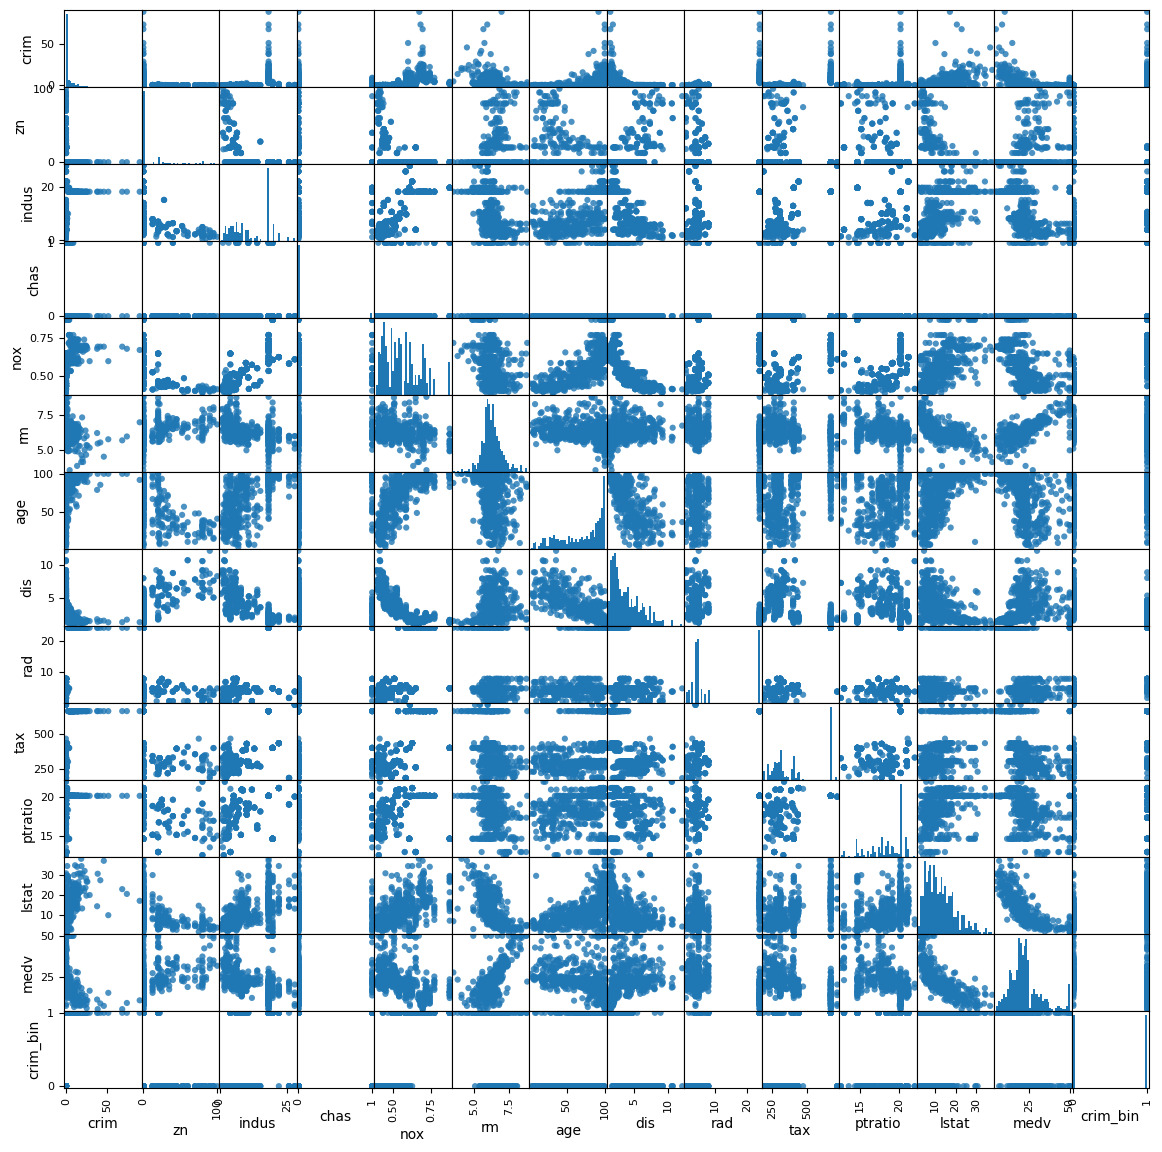

In [10]:
pd.plotting.scatter_matrix(
    Boston,
    figsize=(14,14),
    marker='o',
    hist_kwds={'bins': 40},
    s=20,
    alpha=0.8
)

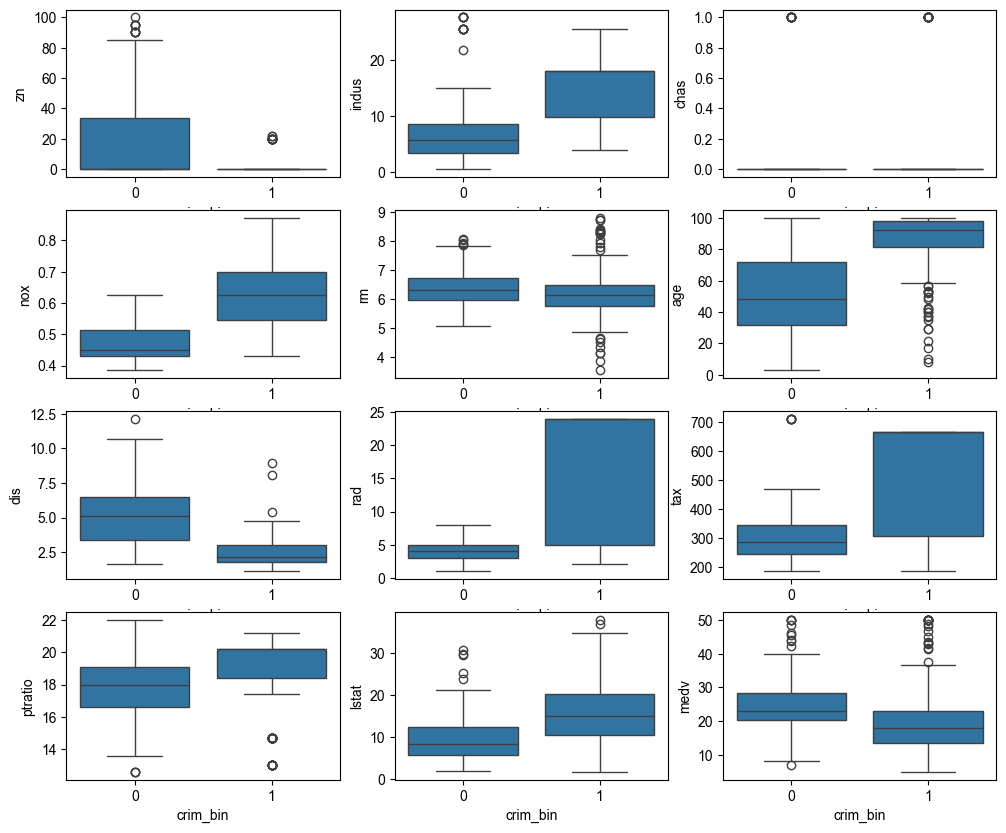

In [13]:
# Boxplots
columns = [['zn', 'indus', 'chas'], 
           ['nox', 'rm', 'age'], 
           ['dis', 'rad', 'tax'], 
           ['ptratio', 'lstat', 'medv']]

fig, ax = plt.subplots(4, 3, figsize=(12, 10))
sns.set_style("whitegrid")
for row in range(len(columns)):
    for col, c in enumerate(columns[row]):
        sns.boxplot(x = 'crim_bin', y = c, data = Boston, ax=ax[row][col])

In [45]:
# Pick the predictors that seem more appropriate
predictors = ['indus', 'nox', 'dis', 'medv', 'ptratio', 'lstat', 'rad', 'tax', 'age', 'rm', 'zn', 'chas']

In [46]:
n_rows, _ = Boston.shape

In [47]:
n_train = int(n_rows*0.5)
train, test = Boston.iloc[:n_train], Boston.iloc[n_train:]

In [48]:
X_train, y_train = train[predictors], train['crim_bin']
X_test, y_test = test[predictors], test['crim_bin']

In [49]:
def fit_model(model, supress_output=False):
    # model can be LogisticRegression(), LDA(), etc
    model.fit(X_train, y_train)

    test_score = model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)

    if not supress_output:
        print(f'Test score: {test_score}')
        print(f'Test error: {1-test_score}')
        print(f'\nTrain score: {train_score}')
        print(f'Train error: {1-train_score}')

    return test_score, train_score

In [50]:
models = [
    LogisticRegression(),
    LDA(),
    QDA(),
    GaussianNB(), # Naive Bayes
    KNeighborsClassifier(n_neighbors=1)
]

for model in models:
    print('--------------')
    print(f'Using {model}')
    fit_model(model)

--------------
Using LogisticRegression()
Test score: 0.849802371541502
Test error: 0.15019762845849804

Train score: 0.8063241106719368
Train error: 0.19367588932806323
--------------
Using LinearDiscriminantAnalysis()
Test score: 0.8774703557312253
Test error: 0.12252964426877466

Train score: 0.8221343873517787
Train error: 0.17786561264822132
--------------
Using QuadraticDiscriminantAnalysis()
Test score: 0.35177865612648224
Test error: 0.6482213438735178

Train score: 0.9565217391304348
Train error: 0.04347826086956519
--------------
Using GaussianNB()
Test score: 0.849802371541502
Test error: 0.15019762845849804

Train score: 0.8102766798418972
Train error: 0.18972332015810278
--------------
Using KNeighborsClassifier(n_neighbors=1)
Test score: 0.3794466403162055
Test error: 0.6205533596837944

Train score: 1.0
Train error: 0.0


c:\Users\carlo\OneDrive\Documents\Python\ISLP\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Max test score: 0.8893280632411067


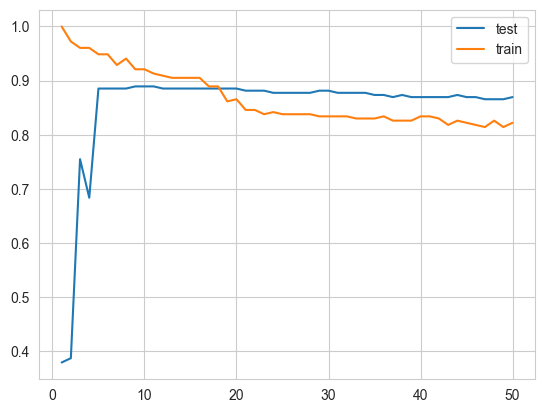

In [51]:
k_vals = list(range(1, 51))
test_scores = []
train_scores = []

for k in k_vals:
    test, train = fit_model(KNeighborsClassifier(n_neighbors=k), supress_output=True)
    test_scores.append(test)
    train_scores.append(train)

plt.plot(k_vals, test_scores, label='test')
plt.plot(k_vals, train_scores, label='train')
plt.legend()

print(f'Max test score: {max(test_scores)}')